In [1]:
# MLP Models with Different Activation Functions
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers, utils, datasets

# Parameters
NUM_CLASSES = 10

# Prepare the Data (same for all models)
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

# Model 1: ReLU Activation
def build_relu_model():
    """Build MLP model with ReLU activation"""
    input_layer = layers.Input((32, 32, 3))

    x = layers.Flatten()(input_layer)
    x = layers.Dense(200, activation="relu")(x)
    x = layers.Dense(150, activation="relu")(x)

    output_layer = layers.Dense(NUM_CLASSES, activation="softmax")(x)

    model = models.Model(input_layer, output_layer)
    return model

# Model 2: LeakyReLU Activation
def build_leaky_relu_model():
    """Build MLP model with LeakyReLU activation"""
    input_layer = layers.Input((32, 32, 3))

    x = layers.Flatten()(input_layer)
    x = layers.Dense(200)(x)
    x = layers.LeakyReLU(alpha=0.01)(x)
    x = layers.Dense(150)(x)
    x = layers.LeakyReLU(alpha=0.01)(x)

    output_layer = layers.Dense(NUM_CLASSES, activation="softmax")(x)

    model = models.Model(input_layer, output_layer)
    return model

# Model 3: Sigmoid Activation
def build_sigmoid_model():
    """Build MLP model with Sigmoid activation"""
    input_layer = layers.Input((32, 32, 3))

    x = layers.Flatten()(input_layer)
    x = layers.Dense(200, activation="sigmoid")(x)
    x = layers.Dense(150, activation="sigmoid")(x)

    output_layer = layers.Dense(NUM_CLASSES, activation="softmax")(x)

    model = models.Model(input_layer, output_layer)
    return model

# Create all three models
print("Building models...")
relu_model = build_relu_model()
leaky_relu_model = build_leaky_relu_model()
sigmoid_model = build_sigmoid_model()

print("\n=== ReLU Model Summary ===")
relu_model.summary()

print("\n=== LeakyReLU Model Summary ===")
leaky_relu_model.summary()

print("\n=== Sigmoid Model Summary ===")
sigmoid_model.summary()

print("\nAll three models have been created successfully!")
print("Next step: Compile and train each model separately")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 10)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 10)
Building models...

=== ReLU Model Summary ===


/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │       614,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 150)            │        30,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 646,260 (2.47 MB)

 Trainable params: 646,260 (2.47 MB)

 Non-trainable params: 0 (0.00 B)


=== LeakyReLU Model Summary ===


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 200)            │       614,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 150)            │        30,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 646,260 (2.47 MB)

 Trainable params: 646,260 (2.47 MB)

 Non-trainable params: 0 (0.00 B)


=== Sigmoid Model Summary ===


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 200)            │       614,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 150)            │        30,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 646,260 (2.47 MB)

 Trainable params: 646,260 (2.47 MB)

 Non-trainable params: 0 (0.00 B)


All three models have been created successfully!
Next step: Compile and train each model separately


In [2]:
# Training Steps for All Three Models
# (Continue from the previous code where models are already built)

# Training configuration (same for all models)
LEARNING_RATE = 0.0005
BATCH_SIZE = 32
EPOCHS = 10

print("Starting training process...")

# Step 1: Train ReLU Model
print("\n" + "="*50)
print("TRAINING ReLU MODEL")
print("="*50)

# Compile ReLU model
opt_relu = optimizers.Adam(learning_rate=LEARNING_RATE)
relu_model.compile(
    loss="categorical_crossentropy",
    optimizer=opt_relu,
    metrics=["accuracy"]
)

# Train ReLU model
print("Training ReLU model...")
relu_history = relu_model.fit(
    x_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    shuffle=True,
    validation_split=0.1,
    verbose=1
)

print("ReLU model training completed!")

# Step 2: Train LeakyReLU Model
print("\n" + "="*50)
print("TRAINING LeakyReLU MODEL")
print("="*50)

# Compile LeakyReLU model
opt_leaky = optimizers.Adam(learning_rate=LEARNING_RATE)
leaky_relu_model.compile(
    loss="categorical_crossentropy",
    optimizer=opt_leaky,
    metrics=["accuracy"]
)

# Train LeakyReLU model
print("Training LeakyReLU model...")
leaky_relu_history = leaky_relu_model.fit(
    x_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    shuffle=True,
    validation_split=0.1,
    verbose=1
)

print("LeakyReLU model training completed!")

# Step 3: Train Sigmoid Model
print("\n" + "="*50)
print("TRAINING SIGMOID MODEL")
print("="*50)

# Compile Sigmoid model
opt_sigmoid = optimizers.Adam(learning_rate=LEARNING_RATE)
sigmoid_model.compile(
    loss="categorical_crossentropy",
    optimizer=opt_sigmoid,
    metrics=["accuracy"]
)

# Train Sigmoid model
print("Training Sigmoid model...")
sigmoid_history = sigmoid_model.fit(
    x_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    shuffle=True,
    validation_split=0.1,
    verbose=1
)

print("Sigmoid model training completed!")

print("\n" + "="*50)
print("ALL MODELS TRAINING COMPLETED")
print("="*50)

# Save training histories for analysis
training_histories = {
    'relu': relu_history,
    'leaky_relu': leaky_relu_history,
    'sigmoid': sigmoid_history
}

print("Training histories saved for evaluation step.")

Starting training process...

TRAINING ReLU MODEL
Training ReLU model...
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.2788 - loss: 1.9823 - val_accuracy: 0.3564 - val_loss: 1.8267
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.3864 - loss: 1.7067 - val_accuracy: 0.4314 - val_loss: 1.6457
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.4200 - loss: 1.6149 - val_accuracy: 0.4168 - val_loss: 1.6221
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.4435 - loss: 1.5609 - val_accuracy: 0.4432 - val_loss: 1.5545
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.4612 - loss: 1.5117 - val_accuracy: 0.4536 - val_loss: 1.5339
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.4732 - loss: 1.4756 - val_accuracy: 0.4704 - val_loss: 1.5135
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4898 - loss: 1.4411 - val_accuracy: 0.4564 - val_loss: 1.5645
Epo

Starting evaluation process...

EVALUATING ALL MODELS
Evaluating ReLU model...
ReLU - Test Loss: 1.4754, Test Accuracy: 0.4756
Evaluating LeakyReLU model...
LeakyReLU - Test Loss: 1.4293, Test Accuracy: 0.4952
Evaluating Sigmoid model...
Sigmoid - Test Loss: 1.4851, Test Accuracy: 0.4802

RESULTS SUMMARY
  Activation Function  Final Training Accuracy  Final Training Loss  \
0                ReLU                 0.502667             1.394347   
1           LeakyReLU                 0.510578             1.376361   
2             Sigmoid                 0.496756             1.412919   

   Test Accuracy  Test Loss  
0         0.4756   1.475404  
1         0.4952   1.429344  
2         0.4802   1.485099  

PLOTTING TRAINING HISTORIES


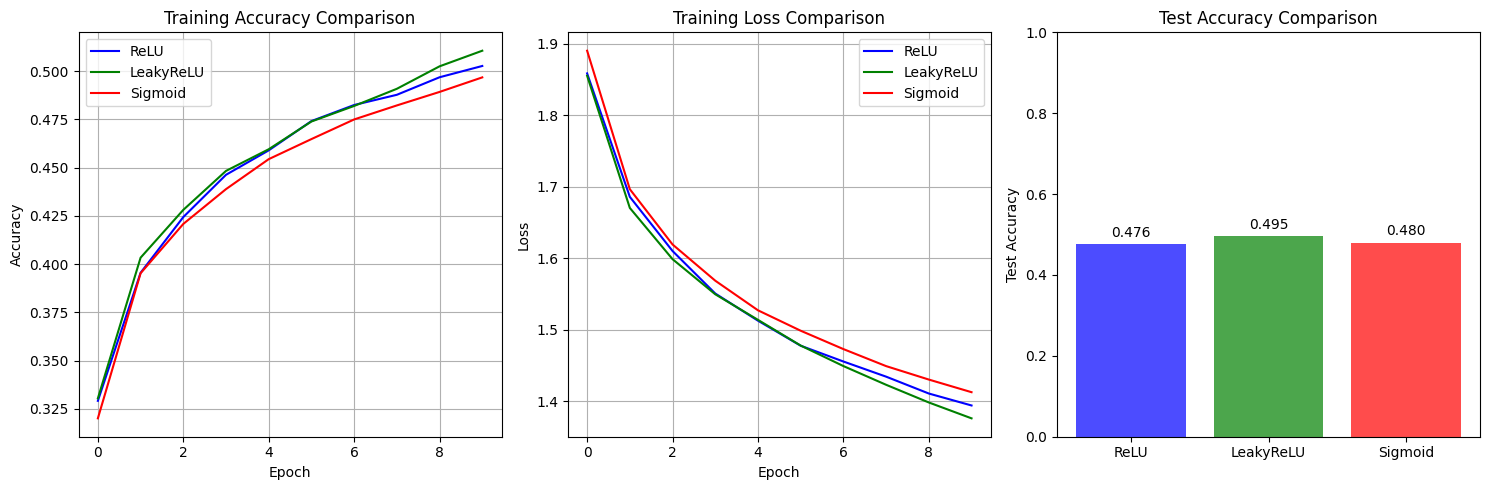


SAMPLE PREDICTIONS
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Sample Predictions (First 10 test images):
----------------------------------------------------------------------
Image |     Actual |       ReLU |  LeakyReLU |    Sigmoid
----------------------------------------------------------------------
    1 |        cat |        dog |        cat |        cat
    2 |       ship | automobile |       ship | automobile
    3 |       ship |       ship |       ship | automobile
    4 |   airplane |   airplane |       ship |   airplane
    5 |       frog |       deer |       deer |       deer
    6 |       frog |       frog |       frog |       frog
    7 | automobile |        dog |        dog |        cat
    8 |       frog |       frog |       frog |       deer
    9 |        cat |       bird |       deer |       bird
   10 | automobile | automobile | automobile | automobile

Evaluation completed!


In [3]:
# Evaluation Steps for All Three Models
# (Continue from the previous code where all models are trained)

import pandas as pd

print("Starting evaluation process...")

# Step 1: Evaluate all models on test data
print("\n" + "="*50)
print("EVALUATING ALL MODELS")
print("="*50)

# Evaluate ReLU model
print("Evaluating ReLU model...")
relu_test_loss, relu_test_accuracy = relu_model.evaluate(x_test, y_test, verbose=0)
print(f"ReLU - Test Loss: {relu_test_loss:.4f}, Test Accuracy: {relu_test_accuracy:.4f}")

# Evaluate LeakyReLU model
print("Evaluating LeakyReLU model...")
leaky_test_loss, leaky_test_accuracy = leaky_relu_model.evaluate(x_test, y_test, verbose=0)
print(f"LeakyReLU - Test Loss: {leaky_test_loss:.4f}, Test Accuracy: {leaky_test_accuracy:.4f}")

# Evaluate Sigmoid model
print("Evaluating Sigmoid model...")
sigmoid_test_loss, sigmoid_test_accuracy = sigmoid_model.evaluate(x_test, y_test, verbose=0)
print(f"Sigmoid - Test Loss: {sigmoid_test_loss:.4f}, Test Accuracy: {sigmoid_test_accuracy:.4f}")

# Step 2: Collect and organize results
print("\n" + "="*50)
print("RESULTS SUMMARY")
print("="*50)

# Extract final training metrics
relu_final_train_acc = relu_history.history['accuracy'][-1]
relu_final_train_loss = relu_history.history['loss'][-1]

leaky_final_train_acc = leaky_relu_history.history['accuracy'][-1]
leaky_final_train_loss = leaky_relu_history.history['loss'][-1]

sigmoid_final_train_acc = sigmoid_history.history['accuracy'][-1]
sigmoid_final_train_loss = sigmoid_history.history['loss'][-1]

# Create results dataframe
results_data = {
    'Activation Function': ['ReLU', 'LeakyReLU', 'Sigmoid'],
    'Final Training Accuracy': [relu_final_train_acc, leaky_final_train_acc, sigmoid_final_train_acc],
    'Final Training Loss': [relu_final_train_loss, leaky_final_train_loss, sigmoid_final_train_loss],
    'Test Accuracy': [relu_test_accuracy, leaky_test_accuracy, sigmoid_test_accuracy],
    'Test Loss': [relu_test_loss, leaky_test_loss, sigmoid_test_loss]
}

results_df = pd.DataFrame(results_data)
print(results_df)

# Step 3: Plot training histories
print("\n" + "="*50)
print("PLOTTING TRAINING HISTORIES")
print("="*50)

# Plot training accuracy
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(relu_history.history['accuracy'], label='ReLU', color='blue')
plt.plot(leaky_relu_history.history['accuracy'], label='LeakyReLU', color='green')
plt.plot(sigmoid_history.history['accuracy'], label='Sigmoid', color='red')
plt.title('Training Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training loss
plt.subplot(1, 3, 2)
plt.plot(relu_history.history['loss'], label='ReLU', color='blue')
plt.plot(leaky_relu_history.history['loss'], label='LeakyReLU', color='green')
plt.plot(sigmoid_history.history['loss'], label='Sigmoid', color='red')
plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot test accuracy comparison
plt.subplot(1, 3, 3)
activation_names = ['ReLU', 'LeakyReLU', 'Sigmoid']
test_accuracies = [relu_test_accuracy, leaky_test_accuracy, sigmoid_test_accuracy]
colors = ['blue', 'green', 'red']

plt.bar(activation_names, test_accuracies, color=colors, alpha=0.7)
plt.title('Test Accuracy Comparison')
plt.ylabel('Test Accuracy')
plt.ylim(0, 1)

# Add value labels on bars
for i, v in enumerate(test_accuracies):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Step 4: Generate sample predictions
print("\n" + "="*50)
print("SAMPLE PREDICTIONS")
print("="*50)

CLASSES = np.array([
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
])

# Get predictions from all models
relu_preds = relu_model.predict(x_test[:10])
leaky_preds = leaky_relu_model.predict(x_test[:10])
sigmoid_preds = sigmoid_model.predict(x_test[:10])

# Convert to class names
relu_pred_classes = CLASSES[np.argmax(relu_preds, axis=-1)]
leaky_pred_classes = CLASSES[np.argmax(leaky_preds, axis=-1)]
sigmoid_pred_classes = CLASSES[np.argmax(sigmoid_preds, axis=-1)]
actual_classes = CLASSES[np.argmax(y_test[:10], axis=-1)]

# Display comparison
print("Sample Predictions (First 10 test images):")
print("-" * 70)
print(f"{'Image':>5} | {'Actual':>10} | {'ReLU':>10} | {'LeakyReLU':>10} | {'Sigmoid':>10}")
print("-" * 70)

for i in range(10):
    print(f"{i+1:>5} | {actual_classes[i]:>10} | {relu_pred_classes[i]:>10} | "
          f"{leaky_pred_classes[i]:>10} | {sigmoid_pred_classes[i]:>10}")

print("\nEvaluation completed!")